# Module 6: Root fining and optimization


Finding an extremum (minimum or maximum) of a function $f(x)$ of a single variable, we need to solve the equation $f’(x)=0$, assuming $f(x)$ is differentiable. Hence, we start with the problem of root fining.


## Root finding in 1D: [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

Given the interval $[a, b]$ such that $f(a)f(b) < 0$, i.e., $f(a)$ has the opposite sign of $f(b)$, find $x \in [a, b]$, such that $f(x) = 0$.

In [6]:
function bisection(f::Function, a::Real, b::Real, max_nsteps::Int = 1000, abstol::Real = 1e-15)
    
    @assert f(a) * f(b) < 0
    
    mid = a + (b - a) / 2
    
    for step = 1:max_nsteps
        
        @show mid
        
        if abs(f(mid)) < abstol
            return mid
        end
        
        if f(a) * f(mid) < 0
           b = mid 
        else 
            # f(mid) * f(b) < 0
            a = mid
        end
        
        mid = a + (b - a) / 2
    end
    
    println("Maximum number of iterations is reached")
    
    return mid
end

bisection (generic function with 3 methods)

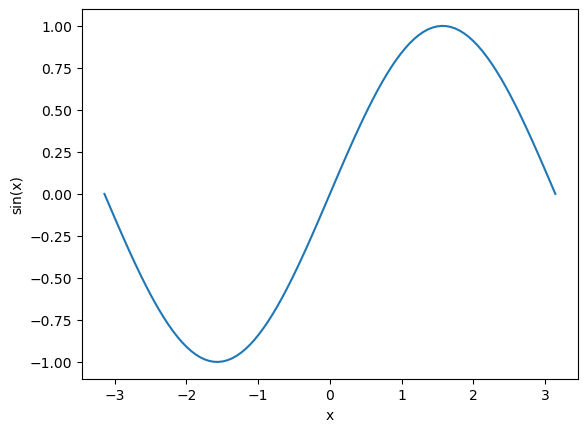

In [7]:
using PyPlot

x = range(-π, π, 100)

plot(x, sin.(x))
xlabel("x")
ylabel("sin(x)")
show()

In [9]:
bisection(sin, -1.5, 3)

mid = 0.75
mid = -0.375
mid = 0.1875
mid = -0.09375
mid = 0.046875
mid = -0.0234375
mid = 0.01171875
mid = -0.005859375
mid = 0.0029296875
mid = -0.00146484375
mid = 0.000732421875
mid = -0.0003662109375
mid = 0.00018310546875
mid = -9.1552734375e-5
mid = 4.57763671875e-5
mid = -2.288818359375e-5
mid = 1.1444091796875e-5
mid = -5.7220458984375e-6
mid = 2.86102294921875e-6
mid = -1.430511474609375e-6
mid = 7.152557373046875e-7
mid = -3.5762786865234375e-7
mid = 1.7881393432617188e-7
mid = -8.940696716308594e-8
mid = 4.470348358154297e-8
mid = -2.2351741790771484e-8
mid = 1.1175870895385742e-8
mid = -5.587935447692871e-9
mid = 2.7939677238464355e-9
mid = -1.3969838619232178e-9
mid = 6.984919309616089e-10
mid = -3.4924596548080444e-10
mid = 1.7462298274040222e-10
mid = -8.731149137020111e-11
mid = 4.3655745685100555e-11
mid = -2.1827872842550278e-11
mid = 1.0913936421275139e-11
mid = -5.4569682106375694e-12
mid = 2.7284841053187847e-12
mid = -1.3642420526593924e-12
mid = 6.821210263296962

6.661338147750939e-16

## [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) in 1D

[This is an iterative method](http://dlmf.nist.gov/3.8.ii) for real twice-continuously differentiable, or complex analytic, function:

$$
    x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

Note that there are [cases](https://en.wikipedia.org/wiki/Newton%27s_method) when the method does not converge. 

![!](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/554px-Newton_iteration.svg.png)

In [ ]:
function newton(f::Function, diff_f::Function, x₀, max_nsteps::Int = 1000, abstol::Real = 1e-15)
     xₙ = x₀
    
    for step = 1:max_nsteps
        
        if abs(f(xₙ)) < abstol
           return xₙ 
        end
        
        # xₙ = xₙ - f(xₙ) / diff_f(xₙ)
        xₙ =- f(xₙ) / diff_f(xₙ)
    end
    
    println("Maximum number of iterations is reached")
    
    return xₙ 
end